In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('preproc.csv')
df

,ID,Name,Nationality,Club,Age,Height,Weight,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,precise_position,Defense,Forward,Goalkeeper,Midfield
0,158023,L. Messi,Argentina,FC Barcelona,31,5.583333,159.0,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,RF,0,1,0,0
1,20801,Cristiano Ronaldo,Portugal,Juventus,33,6.166667,183.0,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,ST,0,1,0,0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,26,5.750000,150.0,92,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,LW,0,1,0,0
3,193080,De Gea,Spain,Manchester United,27,6.333333,168.0,91,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,GK,0,0,1,0
4,192985,K. De Bruyne,Belgium,Manchester City,27,5.916667,154.0,91,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,RCM,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,238813,J. Lundstram,England,Crewe Alexandra,19,5.750000,134.0,47,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,CM,0,0,0,1
17914,243165,N. Christoffersson,Sweden,Trelleborgs FF,19,6.250000,170.0,47,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,ST,0,1,0,0
17915,241638,B. Worman,England,Cambridge United,16,5.666667,148.0,47,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,ST,0,1,0,0
17916,246268,D. Walker-Rice,England,Tranmere Rovers,17,5.833333,154.0,47,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,RW,0,1,0,0


In [3]:
y = 'Overall'

skills = [ 'Crossing', 'Finishing', 'HeadingAccuracy', 
       'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

cols = [ 'Defense', 'Forward', 'Goalkeeper', 'Midfield', 'Age', 'Height', 'Weight' ] + skills + [y]

In [4]:
df = df[cols].astype('float32')
df

,Defense,Forward,Goalkeeper,Midfield,Age,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Overall
0,0.0,1.0,0.0,0.0,31.0,5.583333,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,94.0
1,0.0,1.0,0.0,0.0,33.0,6.166667,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,94.0
2,0.0,1.0,0.0,0.0,26.0,5.750000,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,92.0
3,0.0,0.0,1.0,0.0,27.0,6.333333,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,91.0
4,0.0,0.0,0.0,1.0,27.0,5.916667,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,0.0,0.0,0.0,1.0,19.0,5.750000,134.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,47.0
17914,0.0,1.0,0.0,0.0,19.0,6.250000,170.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,47.0
17915,0.0,1.0,0.0,0.0,16.0,5.666667,148.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,47.0
17916,0.0,1.0,0.0,0.0,17.0,5.833333,154.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,47.0


<AxesSubplot:xlabel='Finishing', ylabel='Volleys'>

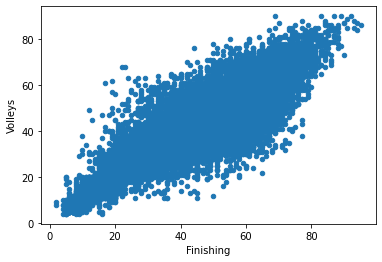

In [11]:
df.plot(x='Finishing', y='Volleys', kind='scatter')

<AxesSubplot:xlabel='Height', ylabel='Balance'>

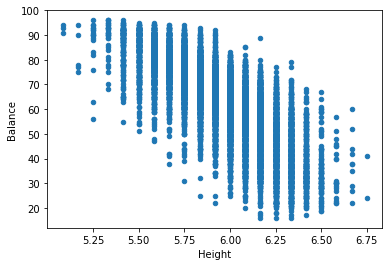

In [12]:
df.plot(x='Height', y='Balance', kind='scatter')

### Correlation matrix

In [5]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Defense,Forward,Goalkeeper,Midfield,Age,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Overall
Defense,1.000000,-0.332837,-0.244083,-0.537443,0.052207,0.141740,0.120052,0.054089,-0.371449,0.347040,0.023801,-0.284442,-0.109596,-0.140695,-0.156745,0.034197,-0.029134,-0.021600,0.019861,-0.153260,-0.119207,-0.162809,0.232134,0.208555,0.292446,-0.269602,0.381908,0.570391,-0.215314,-0.353608,-0.224504,-0.014928,0.576920,0.606100,0.627976,-0.236363,-0.237415,-0.238279,-0.236268,-0.237307,0.014284
Forward,-0.332837,1.000000,-0.170560,-0.375553,-0.048415,-0.026413,-0.003023,0.025810,0.500812,0.216141,0.034357,0.402003,0.245642,0.167441,0.098020,-0.149533,0.201705,0.212357,0.229355,0.180197,0.091033,0.303505,0.049844,0.036561,0.036587,0.316091,-0.117654,-0.434861,0.375809,0.121397,0.410199,0.091244,-0.391583,-0.446721,-0.464153,-0.167820,-0.167063,-0.164876,-0.167727,-0.167742,0.009827
Goalkeeper,-0.244083,-0.170560,1.000000,-0.275409,0.068975,0.365168,0.333759,-0.684089,-0.608657,-0.772507,-0.757451,-0.611028,-0.777992,-0.625450,-0.575432,-0.621694,-0.816264,-0.623269,-0.628283,-0.557940,-0.523065,-0.677047,-0.221526,-0.729279,-0.132561,-0.633896,-0.602262,-0.507026,-0.702323,-0.409706,-0.643990,-0.418729,-0.570455,-0.548475,-0.525080,0.975230,0.973910,0.971437,0.970410,0.974651,-0.085445
Midfield,-0.537443,-0.375553,-0.275409,1.000000,-0.055997,-0.352165,-0.329761,0.370609,0.348679,-0.008189,0.440490,0.346062,0.411920,0.406111,0.445186,0.490855,0.394605,0.253594,0.203142,0.364156,0.380669,0.351076,-0.120441,0.242273,-0.225595,0.415922,0.117206,0.129710,0.359741,0.508699,0.303019,0.212278,0.129614,0.131724,0.109527,-0.269003,-0.267744,-0.267071,-0.266043,-0.267780,0.033701
Age,0.052207,-0.048415,0.068975,-0.055997,1.000000,0.082072,0.229824,0.131788,0.070071,0.148819,0.134731,0.143565,0.011510,0.144878,0.195120,0.183135,0.086686,-0.158441,-0.150996,-0.018353,-0.089610,0.158509,0.178950,0.099725,0.334980,0.156305,0.267105,0.199092,0.084534,0.189320,0.140348,0.393253,0.144225,0.120774,0.103710,0.100152,0.105288,0.103732,0.115568,0.102251,0.453252
Height,0.141740,-0.026413,0.365168,-0.352165,0.082072,1.000000,0.754278,-0.487496,-0.370213,0.012939,-0.366578,-0.349475,-0.493566,-0.441426,-0.404372,-0.331592,-0.416810,-0.546243,-0.466083,-0.622604,-0.785068,-0.291427,-0.070080,-0.287994,0.535979,-0.381254,-0.043861,-0.050501,-0.435277,-0.369227,-0.340470,-0.136029,-0.074023,-0.059047,-0.067340,0.360674,0.361023,0.359021,0.362115,0.362684,0.038241
Weight,0.120052,-0.003023,0.333759,-0.329761,0.229824,0.754278,1.000000,-0.393357,-0.292018,0.037363,-0.289671,-0.262760,-0.413586,-0.346112,-0.304470,-0.260392,-0.337373,-0.477980,-0.410845,-0.534680,-0.663470,-0.190664,0.008946,-0.221977,0.616456,-0.277736,0.031847,-0.024914,-0.349578,-0.283542,-0.252879,-0.034163,-0.048570,-0.046085,-0.055614,0.339089,0.338283,0.337147,0.341427,0.340260,0.154095
Crossing,0.054089,0.025810,-0.684089,0.370609,0.131788,-0.487496,-0.393357,1.000000,0.655624,0.468709,0.809663,0.690331,0.856842,0.834130,0.761294,0.756736,0.841058,0.667854,0.645068,0.697932,0.618225,0.706363,0.136358,0.671750,-0.029527,0.742400,0.473960,0.427776,0.783091,0.685027,0.646079,0.576099,0.443398,0.428998,0.409835,-0.662319,-0.659695,-0.659084,-0.659557,-0.661841,0.396261
Finishing,-0.371449,0.500812,-0.608657,0.348679,0.070071,-0.370213,-0.292018,0.655624,1.000000,0.473663,0.661783,0.882733,0.824212,0.758706,0.697335,0.513221,0.788155,0.606272,0.593887,0.644327,0.523946,0.815507,0.097909,0.510906,-0.009524,0.877658,0.244432,-0.020228,0.889045,0.696954,0.838404,0.533928,0.025161,-0.032441,-0.071802,-0.588513,-0.587089,-0.583312,-0.584821,-0.587007,0.333887
HeadingAccuracy,0.347040,0

In [6]:
# removing repeated correlations Ex: (A, B) and (B, A)
filter_corr = np.triu(np.ones(corr.shape)).astype('bool').reshape(corr.size)
corr = corr.stack()[filter_corr]
sorted_corr = corr.sort_values()
# removing values of correlation of a column with itself Ex: (A, A)
sorted_corr = sorted_corr[[e for e in sorted_corr.index if e[0] != e[1]]]
sorted_corr

Goalkeeper      BallControl     -0.816264
BallControl     GKDiving        -0.788344
                GKReflexes      -0.788013
                GKHandling      -0.786946
Height          Balance         -0.785068
                                   ...   
GKDiving        GKReflexes       0.973271
Goalkeeper      GKHandling       0.973910
StandingTackle  SlidingTackle    0.974614
Goalkeeper      GKReflexes       0.974651
                GKDiving         0.975230
Length: 820, dtype: float64

#### Top 50 positive correlations

In [7]:
sorted_corr.iloc[-50:]

Finishing       ShotPower         0.815507
                Dribbling         0.824212
Curve           BallControl       0.829463
Volleys         Penalties         0.830278
BallControl     ShotPower         0.831708
Volleys         ShotPower         0.832587
Crossing        Curve             0.834130
Curve           LongShots         0.834595
BallControl     LongShots         0.835956
Finishing       Penalties         0.838404
Crossing        BallControl       0.841058
Dribbling       Curve             0.842678
                LongShots         0.843587
ShortPassing    Dribbling         0.844002
Volleys         Positioning       0.848460
Crossing        Dribbling         0.856842
LongShots       Positioning       0.861165
Curve           FKAccuracy        0.861288
BallControl     Positioning       0.863829
Volleys         LongShots         0.868077
Finishing       LongShots         0.877658
                Volleys           0.882733
Interceptions   Marking           0.888651
Finishing  

### Top 50 negative correlations

In [8]:
sorted_corr.iloc[:50]

Goalkeeper       BallControl       -0.816264
BallControl      GKDiving          -0.788344
                 GKReflexes        -0.788013
                 GKHandling        -0.786946
Height           Balance           -0.785068
BallControl      GKPositioning     -0.783528
                 GKKicking         -0.783427
Goalkeeper       Dribbling         -0.777992
                 HeadingAccuracy   -0.772507
                 ShortPassing      -0.757451
Dribbling        GKDiving          -0.754398
                 GKReflexes        -0.754229
                 GKHandling        -0.753213
                 GKPositioning     -0.751232
                 GKKicking         -0.749735
HeadingAccuracy  GKDiving          -0.749536
                 GKHandling        -0.748999
                 GKReflexes        -0.747877
                 GKKicking         -0.745350
                 GKPositioning     -0.743374
ShortPassing     GKDiving          -0.729481
Goalkeeper       Stamina           -0.729279
ShortPassi